In [8]:
import urllib.request
import pandas as pd
import seaborn as sns
import os

# We can bring API later on to extract data
# contents = urllib.request.urlopen("https://data.api.abs.gov.au/rest/").read()

In [9]:
dfs = []
path = os.getcwd() + '/suburbs'

for root,dirs,files in os.walk(path):
    for filename in files:
        if filename.endswith(".csv"):
            df = pd.read_csv(f"{path}/{filename}")
            if 'SA2' in filename:
                suburb_name = filename.split("Region summary_ ")[1].split(" SA2")[0]
            elif 'SA3' in filename:
                suburb_name = filename.split("Region summary_ ")[1].split(" SA3")[0]
            else:
                print('Something wrong with file name')

            # os.rename('{}/{}'.format(path,filename), '{suburb_name}.csv'.format(suburb_name))

            df['Suburb'] = suburb_name
            dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

df.head()

,Measure Code,Parent Description,Description,2011,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Suburb
0,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),NaN,NaN,NaN,NaN,12974.0,13056.0,13107.0,13063.0,13182.0,13380.0,NaN,Aspley
1,ERP_21,Estimated resident population - year ended 30 ...,Population density (persons/km2),NaN,NaN,NaN,NaN,2073.2,2086.3,2094.4,2087.4,2106.4,2138.1,NaN,Aspley
2,ERP_M_20,Estimated resident population - year ended 30 ...,Estimated resident population - males (no.),NaN,NaN,NaN,NaN,6280.0,6328.0,6347.0,6333.0,6347.0,6452.0,NaN,Aspley
3,ERP_F_20,Estimated resident population - year ended 30 ...,Estimated resident population - females (no.),NaN,NaN,NaN,NaN,6694.0,6728.0,6760.0,6730.0,6835.0,6928.0,NaN,Aspley
4,ERP_19,Estimated resident population - year ended 30 ...,Median age - males (years),NaN,NaN,NaN,NaN,40.1,40.4,40.7,41.2,41.0,40.7,NaN,Aspley


In [10]:
df_subset = df[df['Parent Description'] == 'Estimated resident population - year ended 30 June']
df_subset.head()

,Measure Code,Parent Description,Description,2011,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Suburb
0,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),NaN,NaN,NaN,NaN,12974.0,13056.0,13107.0,13063.0,13182.0,13380.0,NaN,Aspley
1,ERP_21,Estimated resident population - year ended 30 ...,Population density (persons/km2),NaN,NaN,NaN,NaN,2073.2,2086.3,2094.4,2087.4,2106.4,2138.1,NaN,Aspley
2,ERP_M_20,Estimated resident population - year ended 30 ...,Estimated resident population - males (no.),NaN,NaN,NaN,NaN,6280.0,6328.0,6347.0,6333.0,6347.0,6452.0,NaN,Aspley
3,ERP_F_20,Estimated resident population - year ended 30 ...,Estimated resident population - females (no.),NaN,NaN,NaN,NaN,6694.0,6728.0,6760.0,6730.0,6835.0,6928.0,NaN,Aspley
4,ERP_19,Estimated resident population - year ended 30 ...,Median age - males (years),NaN,NaN,NaN,NaN,40.1,40.4,40.7,41.2,41.0,40.7,NaN,Aspley


In [11]:
df_subset_melt = df_subset.melt(id_vars=['Measure Code', 'Parent Description','Description', 'Suburb']).dropna().sort_values(['Description','variable'])
df_subset_melt.rename({'variable': 'year'}, axis=1, inplace=True)
df_subset_melt

,Measure Code,Parent Description,Description,Suburb,year,value
612,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Aspley,2018,12974.0
621,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Scarborough - Newport,2018,13093.0
630,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Rothwell - Kippa-Ring,2018,17824.0
639,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Margate - Woody Point,2018,12074.0
648,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Mango Hill,2018,12020.0
...,...,...,...,...,...,...
1492,ERP_18,Estimated resident population - year ended 30 ...,Working age population (aged 15-64 years) (no.),Bracken Ridge,2023,11914.0
1501,ERP_18,Estimated resident population - year ended 30 ...,Working age population (aged 15-64 years) (no.),Redcliffe,2023,39302.0
1510,ERP_18,Estimated resident population - year ended 30 ...,Working age population (aged 15-64 years) (no.),North Lakes,2023,16226.0
1519,ERP_18,Estimated resident population - year ended 30 ...,Working age population (aged 15-64 years) (no.),Scarborough,2023,14073.0


### Put together population and population information data

In [17]:
df_population_table = df_subset_melt[['Description', 'Suburb', 'year', 'value']]
df_population_table = df_population_table[(df_population_table['Description'] == 'Estimated resident population (no.)') | (df_population_table['Description'] == 'Estimated resident population - males (no.)') | (df_population_table['Description'] == 'Estimated resident population - females (no.)')]
df_population_table.head()

,Description,Suburb,year,value
612,Estimated resident population (no.),Aspley,2018,12974.0
621,Estimated resident population (no.),Scarborough - Newport,2018,13093.0
630,Estimated resident population (no.),Rothwell - Kippa-Ring,2018,17824.0
639,Estimated resident population (no.),Margate - Woody Point,2018,12074.0
648,Estimated resident population (no.),Mango Hill,2018,12020.0


In [31]:
df_population_table_pivot = df_population_table.pivot(index=['Suburb', 'year'], columns='Description', values='value').reset_index()
df_population_table_pivot

Description,Suburb,year,Estimated resident population (no.),Estimated resident population - females (no.),Estimated resident population - males (no.)
0,Aspley,2018,12974.0,6694.0,6280.0
1,Aspley,2019,13056.0,6728.0,6328.0
2,Aspley,2020,13107.0,6760.0,6347.0
3,Aspley,2021,13063.0,6730.0,6333.0
4,Aspley,2022,13182.0,6835.0,6347.0
...,...,...,...,...,...
97,Taigum - Fitzgibbon,2019,14036.0,7453.0,6583.0
98,Taigum - Fitzgibbon,2020,14221.0,7552.0,6669.0
99,Taigum - Fitzgibbon,2021,14296.0,7596.0,6700.0
100,Taigum - Fitzgibbon,2022,14446.0,7722.0,6724.0


In [32]:
json_array = df_population_table_pivot.to_json(orient='records')
with open('population1.json', 'w') as file:
    file.write(json_array)

In [ ]:
# df_population_table[df_population_table['Suburb'] == 'Aspley'].sort_values('year')

,Description,Suburb,year,value
612,Estimated resident population (no.),Aspley,2018,12974.0
614,Estimated resident population - males (no.),Aspley,2018,6280.0
615,Estimated resident population - females (no.),Aspley,2018,6694.0
765,Estimated resident population (no.),Aspley,2019,13056.0
767,Estimated resident population - males (no.),Aspley,2019,6328.0
768,Estimated resident population - females (no.),Aspley,2019,6728.0
920,Estimated resident population - males (no.),Aspley,2020,6347.0
921,Estimated resident population - females (no.),Aspley,2020,6760.0
918,Estimated resident population (no.),Aspley,2020,13107.0
1074,Estimated resident population - females (no.),Aspley,2021,6730.0


---

In [71]:
descriptions = df_subset_melt['Description'].unique()
descriptions

array(['Estimated resident population (no.)',
       'Estimated resident population - females (no.)',
       'Estimated resident population - males (no.)',
       'Median age - females (years)', 'Median age - males (years)',
       'Median age - persons (years)', 'Population density (persons/km2)',
       'Working age population (aged 15-64 years) (%)',
       'Working age population (aged 15-64 years) (no.)'], dtype=object)

In [72]:
df_subset_melt_dict = {}

for description in descriptions:
    df_subset_melt_dict[description] = df_subset_melt[df_subset_melt['Description'] == description]
    

In [73]:
df_subset_melt_dict[descriptions[0]]


,Measure Code,Parent Description,Description,Suburb,year,value
612,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Aspley,2018,12974.0
621,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Scarborough - Newport,2018,13093.0
630,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Rothwell - Kippa-Ring,2018,17824.0
639,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Margate - Woody Point,2018,12074.0
648,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Mango Hill,2018,12020.0
...,...,...,...,...,...,...
1485,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Bracken Ridge,2023,18283.0
1494,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Redcliffe,2023,66730.0
1503,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),North Lakes,2023,24279.0
1512,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Scarborough,2023,19243.0


In [74]:
df_subset_melt_dict[descriptions[0]].sort_values('value', ascending=False)

,Measure Code,Parent Description,Description,Suburb,year,value
1494,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Redcliffe,2023,66730.0
1341,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Redcliffe,2022,65625.0
1188,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Redcliffe,2021,64679.0
1035,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Redcliffe,2020,63843.0
882,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Redcliffe,2019,62895.0
...,...,...,...,...,...,...
1323,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Burpengary - East,2022,7538.0
1170,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Burpengary - East,2021,6747.0
1017,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Burpengary - East,2020,6003.0
864,ERP_P_20,Estimated resident population - year ended 30 ...,Estimated resident population (no.),Burpengary - East,2019,5314.0


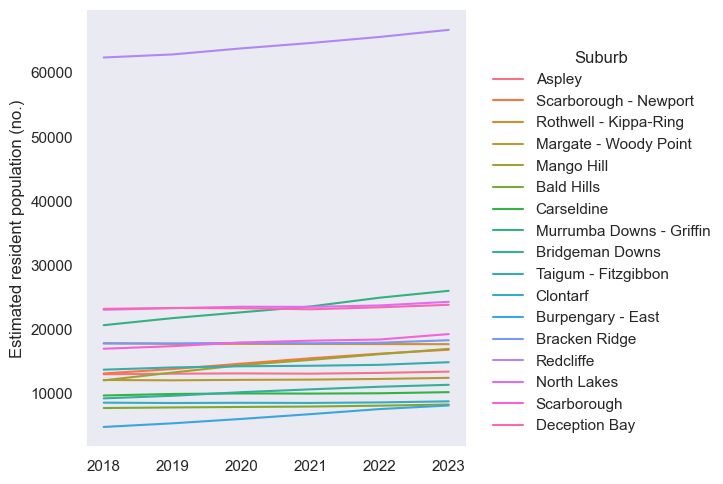

In [ ]:
# Redcliffe dominates the population graph 


# sns.relplot(data=df_subset_melt_dict[descriptions[0]], x="year", y="value", kind="line", hue='Suburb')

sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_subset_melt_dict[descriptions[0]],
    x="year", y="value",   hue="Suburb",
    kind="line"
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

#     # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

#     # Plot every year's time series in the background
    sns.lineplot(
        data=df_subset_melt_dict[descriptions[0]], x="year", y="value",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", descriptions[0])
g.tight_layout()

In [ ]:
# https://dash.plotly.com/interactive-graphing